<a href="https://colab.research.google.com/github/maximblaze/my-projects/blob/main/cleaned_dirty_Samsung_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
test_data_path = os.path.join('/content/gdrive/My Drive/marketing_campaign_test')
train_data_path = os.path.join('/content/gdrive/My Drive/Colab Notebooks/plates/train')

In [ ]:
import random
import numpy as np
import torch
seed = 100
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [ ]:
import shutil 
from tqdm import tqdm

train_dir = 'train'
val_dir = 'val'

class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

for class_name in class_names:
    source_dir = os.path.join(train_data_path, class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

100%|██████████| 84/84 [00:15<00:00,  5.43it/s]


In [ ]:
dest_dir

'train/dirty'

In [ ]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms

train_transforms = transforms.Compose([
                                       
    transforms.RandomChoice([transforms.CenterCrop(190), transforms.CenterCrop(224)]),
    
    #transforms.CenterCrop(190),

    transforms.RandomPerspective(distortion_scale=0.2, p=0.1, interpolation=3, fill=255),

    
    transforms.RandomApply([transforms.RandomCrop(180, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')], 0.3),

    transforms.RandomChoice([torchvision.transforms.RandomRotation(45, resample=False, expand=False, center=None, fill=None), transforms.RandomHorizontalFlip()]),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),

    transforms.RandomChoice([transforms.ColorJitter(brightness=0, contrast=0.5, saturation=0, hue=(0.1, 0.2)), 
                             transforms.ColorJitter(brightness=0.1, contrast=0.5, saturation=0, hue=(0.1, 0.2)),
                             transforms.ColorJitter(brightness=0.5, contrast=1, saturation=0, hue=(0.1, 0.2))]),

    transforms.Resize((224, 224)),
    
    
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

])

val_transforms = transforms.Compose([

    transforms.CenterCrop(190),

    transforms.RandomPerspective(distortion_scale=0.2, p=0.1, interpolation=3, fill=255),
    
    transforms.RandomHorizontalFlip(),

    transforms.RandomVerticalFlip(),
  
    transforms.Resize((224, 224)),
   
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 8
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size, drop_last=True)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size, drop_last=True)

print('Ok')


Ok


In [ ]:
len(val_dataset)

28

In [ ]:
"""
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms, models


train_transforms = transforms.Compose([
                                       
    transforms.RandomChoice([transforms.CenterCrop(190), transforms.CenterCrop(200), transforms.CenterCrop(224)]),


    transforms.RandomPerspective(distortion_scale=0.2, p=0.1, interpolation=3, fill=255),

    
    transforms.RandomApply([transforms.RandomCrop(170, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')], 0.3),

    transforms.RandomChoice([torchvision.transforms.RandomRotation(45, resample=False, expand=False, center=None, fill=None), torchvision.transforms.RandomRotation(30, resample=False, expand=False, center=None, fill=None)]),

    transforms.RandomHorizontalFlip(),

    transforms.RandomVerticalFlip(),

    transforms.RandomChoice([transforms.ColorJitter(brightness=0, contrast=0.5, saturation=0, hue=(0.1, 0.2)), 
                             transforms.ColorJitter(brightness=0.1, contrast=0.5, saturation=0, hue=(0.1, 0.2)),
                             transforms.ColorJitter(brightness=0.5, contrast=1, saturation=0.1, hue=(0.1, 0.2)),
                             transforms.ColorJitter(brightness=0.6, contrast=0.3, saturation=0.3, hue=(0.1, 0.2))]
                            ),

    transforms.Resize((224, 224)),
    
    
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])


])

val_transforms = transforms.Compose([
    
    transforms.CenterCrop(190),


    #transforms.RandomChoice([transforms.ColorJitter(brightness=0, contrast=0.5, saturation=0, hue=(0.1, 0.2)), 
                        #     transforms.ColorJitter(brightness=0.1, contrast=0.5, saturation=0, hue=(0.1, 0.2)),
                         #    transforms.ColorJitter(brightness=0.5, contrast=1, saturation=0.1, hue=(0.1, 0.2)),
                         #    transforms.ColorJitter(brightness=0.6, contrast=0.3, saturation=0.3, hue=(0.1, 0.2))]
                         #   ),

    transforms.RandomHorizontalFlip(),

    transforms.RandomVerticalFlip(),

    #transforms.RandomPerspective(distortion_scale=0.2, p=0.1, interpolation=3, fill=255),
    
    #transforms.RandomApply([transforms.RandomCrop(100, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')], 0.3),

    #transforms.RandomChoice([torchvision.transforms.RandomRotation(30, resample=False, expand=False, center=None, fill=None), transforms.RandomHorizontalFlip()]),

    #transforms.RandomChoice([transforms.ColorJitter(brightness=0, contrast=0.5, saturation=0, hue=(0.1, 0.2)), 
                            # transforms.ColorJitter(brightness=0.1, contrast=0.5, saturation=0, hue=(0.1, 0.2)),
                           #  transforms.ColorJitter(brightness=0.5, contrast=1, saturation=0, hue=(0.1, 0.2))]),

    #transforms.RandomPerspective(distortion_scale=0.2, p=0.1, interpolation=3, fill=255),

    transforms.Resize((224, 224)),
   
  
    
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 8
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size, drop_last=True)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size, drop_last=True)

print('Ok')
"""



"\nimport torch\nimport numpy as np\nimport torchvision\nimport matplotlib.pyplot as plt\nimport time\nimport copy\n\nfrom torchvision import transforms, models\n\n\ntrain_transforms = transforms.Compose([\n                                       \n    transforms.RandomChoice([transforms.CenterCrop(190), transforms.CenterCrop(200), transforms.CenterCrop(224)]),\n\n\n    transforms.RandomPerspective(distortion_scale=0.2, p=0.1, interpolation=3, fill=255),\n\n    \n    transforms.RandomApply([transforms.RandomCrop(170, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')], 0.3),\n\n    transforms.RandomChoice([torchvision.transforms.RandomRotation(45, resample=False, expand=False, center=None, fill=None), torchvision.transforms.RandomRotation(30, resample=False, expand=False, center=None, fill=None)]),\n\n    transforms.RandomHorizontalFlip(),\n\n    transforms.RandomVerticalFlip(),\n\n    transforms.RandomChoice([transforms.ColorJitter(brightness=0, contrast=0.5, saturatio

In [ ]:
len(train_dataset)

140

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


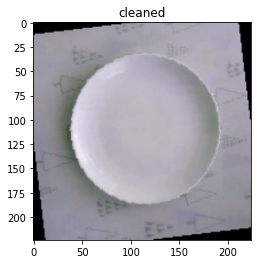

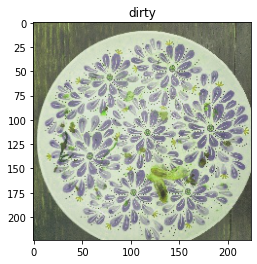

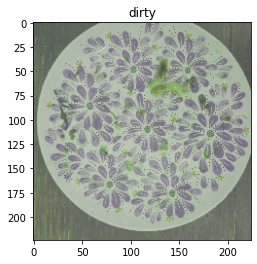

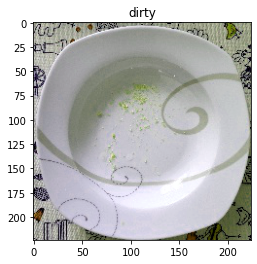

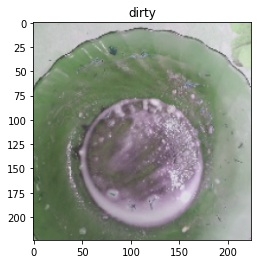

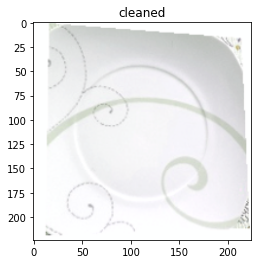

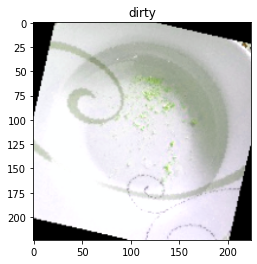

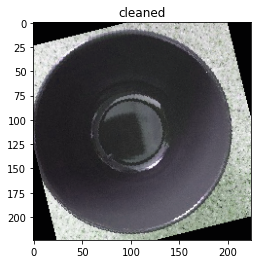

In [ ]:
X_batch, y_batch = next(iter(val_dataloader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean)

def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

X_batch, y_batch = next(iter(train_dataloader))

for x_item, y_item in zip(X_batch, y_batch):
    show_input(x_item, title=class_names[y_item])

In [ ]:
#len(train_dataloader), len(train_dataset),
len(val_dataloader)
len(val_dataset)

28

In [ ]:
class net_for_cleaned_dirty(torch.nn.Module):
  def __init__(self):
    super(net_for_cleaned_dirty, self).__init__()
    self.model = models.resnet50(pretrained=True)
    for param in self.model.parameters():
            param.requires_grad = False           
    fc_inputs = self.model.fc.in_features

    self.model.fc = torch.nn.Sequential(
      torch.nn.Linear(fc_inputs, 1024), #first fc transform from resnet

      torch.nn.BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),  #на лучшем результате не было батч нор

      torch.nn.ReLU(),

      torch.nn.Linear(1024, 2),

    )
  def forward(self, x):
    x = self.model(x)
    return x


model = net_for_cleaned_dirty()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.02, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False) #torch.optim.Adam(model.parameters(), amsgrad=True, lr=2*0.01)

# Decay LR by a factor of 0.1 every 5 epochs of patience
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)
#torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.01)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
import matplotlib.pyplot as plt

def train_model(model, loss, optimizer, scheduler, num_epochs):
    epoch_loss_list = []
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                #scheduler.step()
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            scheduler.step(epoch_loss)
            epoch_acc = running_acc / len(dataloader)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)
            if phase == 'val':
              epoch_loss_list.append(epoch_loss)
    plt.figure()
    plt.title('Loss on validation')
    plt.xlabel('number of epochs')
    plt.ylabel('Loss')
    plt.plot([i for i in range(len(epoch_loss_list))], epoch_loss_list)
    plt.show()
    return model

Epoch 0/49:


100%|██████████| 17/17 [00:02<00:00,  6.76it/s]

train Loss: 2.7640 Acc: 0.6544



100%|██████████| 3/3 [00:00<00:00,  5.13it/s]

val Loss: 1.1041 Acc: 0.8750
Epoch 1/49:



100%|██████████| 17/17 [00:02<00:00,  7.09it/s]

train Loss: 1.4617 Acc: 0.6250



100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

val Loss: 0.7272 Acc: 0.8750
Epoch 2/49:



100%|██████████| 17/17 [00:02<00:00,  6.78it/s]

train Loss: 1.6093 Acc: 0.7868



100%|██████████| 3/3 [00:00<00:00,  5.12it/s]

val Loss: 3.7345 Acc: 0.6667
Epoch 3/49:



100%|██████████| 17/17 [00:02<00:00,  6.92it/s]

train Loss: 1.3946 Acc: 0.8456



100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

val Loss: 0.0425 Acc: 1.0000
Epoch 4/49:



100%|██████████| 17/17 [00:02<00:00,  6.92it/s]

train Loss: 0.7290 Acc: 0.8456



100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

val Loss: 0.4004 Acc: 0.8750
Epoch 5/49:



100%|██████████| 17/17 [00:02<00:00,  7.23it/s]

train Loss: 0.2531 Acc: 0.9338



100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

val Loss: 0.3935 Acc: 0.8750
Epoch 6/49:



100%|██████████| 17/17 [00:02<00:00,  7.10it/s]

train Loss: 0.3959 Acc: 0.9191



100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

val Loss: 0.2055 Acc: 0.9167
Epoch 7/49:



100%|██████████| 17/17 [00:02<00:00,  7.00it/s]

train Loss: 0.1366 Acc: 0.9559



100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

val Loss: 0.2613 Acc: 0.9167
Epoch 8/49:



100%|██████████| 17/17 [00:02<00:00,  7.29it/s]

train Loss: 0.5165 Acc: 0.8824



100%|██████████| 3/3 [00:00<00:00,  5.17it/s]

val Loss: 0.2066 Acc: 0.8750
Epoch 9/49:



100%|██████████| 17/17 [00:02<00:00,  6.88it/s]

train Loss: 0.3568 Acc: 0.9044



100%|██████████| 3/3 [00:00<00:00,  5.06it/s]

val Loss: 0.1245 Acc: 0.9583
Epoch 10/49:



100%|██████████| 17/17 [00:02<00:00,  7.04it/s]

train Loss: 0.2325 Acc: 0.9338



100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

val Loss: 0.0783 Acc: 0.9583
Epoch 11/49:



100%|██████████| 17/17 [00:02<00:00,  6.72it/s]

train Loss: 0.2908 Acc: 0.8824



100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

val Loss: 0.1260 Acc: 0.9167
Epoch 12/49:



100%|██████████| 17/17 [00:02<00:00,  7.15it/s]

train Loss: 0.2332 Acc: 0.9118



100%|██████████| 3/3 [00:00<00:00,  4.60it/s]

val Loss: 0.1446 Acc: 0.8750
Epoch 13/49:



100%|██████████| 17/17 [00:02<00:00,  6.75it/s]

train Loss: 0.2274 Acc: 0.9191



100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

val Loss: 0.0659 Acc: 1.0000
Epoch 14/49:



100%|██████████| 17/17 [00:02<00:00,  6.97it/s]

train Loss: 0.1267 Acc: 0.9559



100%|██████████| 3/3 [00:00<00:00,  5.08it/s]

val Loss: 0.0654 Acc: 1.0000
Epoch 15/49:



100%|██████████| 17/17 [00:02<00:00,  7.01it/s]

train Loss: 0.1810 Acc: 0.9044



100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

val Loss: 0.1559 Acc: 0.9167
Epoch 16/49:



100%|██████████| 17/17 [00:02<00:00,  6.78it/s]

train Loss: 0.2255 Acc: 0.9191



100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

val Loss: 0.1632 Acc: 0.9583
Epoch 17/49:



100%|██████████| 17/17 [00:02<00:00,  6.83it/s]

train Loss: 0.2655 Acc: 0.9118



100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

val Loss: 0.1877 Acc: 0.9167
Epoch 18/49:



100%|██████████| 17/17 [00:02<00:00,  6.86it/s]

train Loss: 0.5814 Acc: 0.8750



100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

val Loss: 0.1620 Acc: 0.8750
Epoch 19/49:



100%|██████████| 17/17 [00:02<00:00,  6.77it/s]

train Loss: 0.2681 Acc: 0.9118



100%|██████████| 3/3 [00:00<00:00,  4.84it/s]

val Loss: 0.1239 Acc: 0.8750
Epoch 20/49:



100%|██████████| 17/17 [00:02<00:00,  7.09it/s]

train Loss: 0.3918 Acc: 0.8824



100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

val Loss: 0.0464 Acc: 1.0000
Epoch 21/49:



100%|██████████| 17/17 [00:02<00:00,  7.18it/s]

train Loss: 0.1034 Acc: 0.9706



100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

val Loss: 0.0802 Acc: 1.0000
Epoch 22/49:



100%|██████████| 17/17 [00:02<00:00,  7.14it/s]

train Loss: 0.3460 Acc: 0.8971



100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

val Loss: 0.2869 Acc: 0.8750
Epoch 23/49:



100%|██████████| 17/17 [00:02<00:00,  7.07it/s]

train Loss: 0.2596 Acc: 0.9412



100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

val Loss: 0.0953 Acc: 0.9167
Epoch 24/49:



100%|██████████| 17/17 [00:02<00:00,  7.12it/s]

train Loss: 0.1979 Acc: 0.9338



100%|██████████| 3/3 [00:00<00:00,  5.03it/s]

val Loss: 0.1929 Acc: 0.8750
Epoch 25/49:



100%|██████████| 17/17 [00:02<00:00,  7.14it/s]

train Loss: 0.3099 Acc: 0.8971



100%|██████████| 3/3 [00:00<00:00,  5.19it/s]

val Loss: 0.1256 Acc: 0.9583
Epoch 26/49:



100%|██████████| 17/17 [00:02<00:00,  6.95it/s]

train Loss: 0.3387 Acc: 0.9191



100%|██████████| 3/3 [00:00<00:00,  5.05it/s]

val Loss: 0.1240 Acc: 0.9583
Epoch 27/49:



100%|██████████| 17/17 [00:02<00:00,  6.74it/s]

train Loss: 0.2360 Acc: 0.9191



100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

val Loss: 0.0541 Acc: 1.0000
Epoch 28/49:



100%|██████████| 17/17 [00:02<00:00,  7.09it/s]

train Loss: 0.3165 Acc: 0.8971



100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

val Loss: 0.1619 Acc: 0.9583
Epoch 29/49:



100%|██████████| 17/17 [00:02<00:00,  6.92it/s]

train Loss: 0.2122 Acc: 0.9044



100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

val Loss: 0.0835 Acc: 0.9583
Epoch 30/49:



100%|██████████| 17/17 [00:02<00:00,  7.02it/s]

train Loss: 0.1948 Acc: 0.9338



100%|██████████| 3/3 [00:00<00:00,  4.71it/s]

val Loss: 0.0632 Acc: 1.0000
Epoch 31/49:



100%|██████████| 17/17 [00:02<00:00,  6.94it/s]

train Loss: 0.1841 Acc: 0.9338



100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

val Loss: 0.0907 Acc: 0.9167
Epoch 32/49:



100%|██████████| 17/17 [00:02<00:00,  7.04it/s]

train Loss: 0.1917 Acc: 0.9191



100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

val Loss: 0.1037 Acc: 0.9583
Epoch 33/49:



100%|██████████| 17/17 [00:02<00:00,  7.04it/s]

train Loss: 0.2967 Acc: 0.8971



100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

val Loss: 0.0808 Acc: 1.0000
Epoch 34/49:



100%|██████████| 17/17 [00:02<00:00,  7.23it/s]

train Loss: 0.2042 Acc: 0.9265



100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

val Loss: 0.0625 Acc: 0.9583
Epoch 35/49:



100%|██████████| 17/17 [00:02<00:00,  7.22it/s]

train Loss: 0.1547 Acc: 0.9338



100%|██████████| 3/3 [00:00<00:00,  5.00it/s]

val Loss: 0.1986 Acc: 0.8750
Epoch 36/49:



100%|██████████| 17/17 [00:02<00:00,  7.02it/s]

train Loss: 0.3041 Acc: 0.9118



100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

val Loss: 0.1097 Acc: 0.9167
Epoch 37/49:



100%|██████████| 17/17 [00:02<00:00,  6.98it/s]

train Loss: 0.2488 Acc: 0.9412



100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

val Loss: 0.0906 Acc: 0.9167
Epoch 38/49:



100%|██████████| 17/17 [00:02<00:00,  7.18it/s]

train Loss: 0.2157 Acc: 0.9118



100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

val Loss: 0.1724 Acc: 0.9583
Epoch 39/49:



100%|██████████| 17/17 [00:02<00:00,  7.25it/s]

train Loss: 0.2721 Acc: 0.9118



100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

val Loss: 0.1487 Acc: 0.8750
Epoch 40/49:



100%|██████████| 17/17 [00:02<00:00,  7.12it/s]

train Loss: 0.1644 Acc: 0.9485



100%|██████████| 3/3 [00:00<00:00,  5.03it/s]

val Loss: 0.0666 Acc: 1.0000
Epoch 41/49:



100%|██████████| 17/17 [00:02<00:00,  6.82it/s]

train Loss: 0.2752 Acc: 0.8971



100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

val Loss: 0.0870 Acc: 0.9583
Epoch 42/49:



100%|██████████| 17/17 [00:02<00:00,  7.03it/s]

train Loss: 0.2600 Acc: 0.9191



100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

val Loss: 0.1485 Acc: 0.9167
Epoch 43/49:



100%|██████████| 17/17 [00:02<00:00,  6.94it/s]

train Loss: 0.4310 Acc: 0.8824



100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

val Loss: 0.1072 Acc: 0.9167
Epoch 44/49:



100%|██████████| 17/17 [00:02<00:00,  7.09it/s]

train Loss: 0.2104 Acc: 0.9338



100%|██████████| 3/3 [00:00<00:00,  5.14it/s]

val Loss: 0.1025 Acc: 0.9167
Epoch 45/49:



100%|██████████| 17/17 [00:02<00:00,  6.90it/s]

train Loss: 0.4500 Acc: 0.8676



100%|██████████| 3/3 [00:00<00:00,  4.76it/s]

val Loss: 0.1432 Acc: 0.9167
Epoch 46/49:



100%|██████████| 17/17 [00:02<00:00,  7.08it/s]

train Loss: 0.1687 Acc: 0.9118



100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

val Loss: 0.0629 Acc: 1.0000
Epoch 47/49:



100%|██████████| 17/17 [00:02<00:00,  7.09it/s]

train Loss: 0.3234 Acc: 0.8971



100%|██████████| 3/3 [00:00<00:00,  5.05it/s]

val Loss: 0.0633 Acc: 1.0000
Epoch 48/49:



100%|██████████| 17/17 [00:02<00:00,  7.26it/s]

train Loss: 0.3044 Acc: 0.8971



100%|██████████| 3/3 [00:00<00:00,  4.86it/s]

val Loss: 0.2377 Acc: 0.8750
Epoch 49/49:



100%|██████████| 17/17 [00:02<00:00,  7.27it/s]

train Loss: 0.3387 Acc: 0.9265



100%|██████████| 3/3 [00:00<00:00,  5.11it/s]

val Loss: 0.0545 Acc: 1.0000


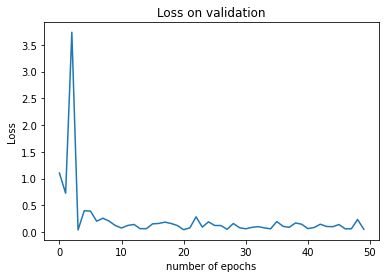

net_for_cleaned_dirty(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential

In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=50)

In [ ]:
test_dir = 'test'
shutil.copytree(test_data_path, os.path.join(test_dir, 'unknown'))

'test/unknown'

In [ ]:
class ImageFolderWithPaths(torchvision.datasets.ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path
    
test_dataset = ImageFolderWithPaths(test_dir, val_transforms)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [ ]:
model.eval()

test_predictions = []
test_img_paths = []
for inputs, labels, paths in tqdm(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)


    test_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:,1].data.cpu().numpy())
    
    
    test_img_paths.extend(paths)
    
test_predictions = np.concatenate(test_predictions)

100%|██████████| 93/93 [00:09<00:00,  9.46it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


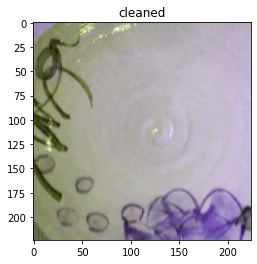

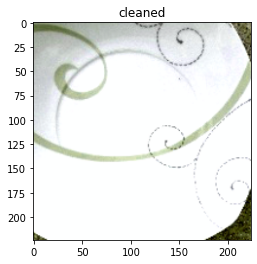

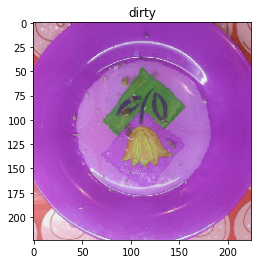

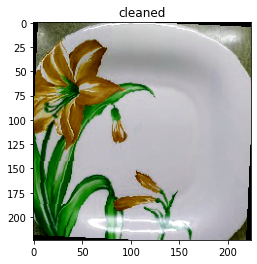

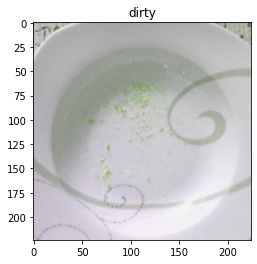

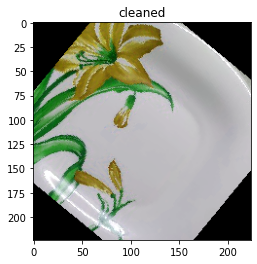

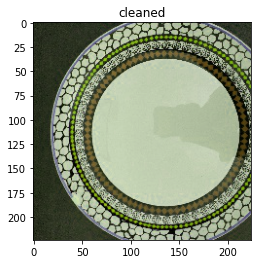

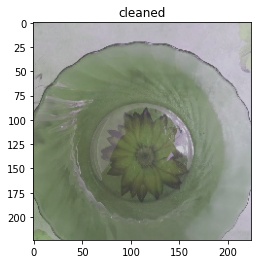

In [ ]:
X_batch, y_batch = next(iter(train_dataloader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean)

def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

X_batch, y_batch = next(iter(train_dataloader))

for x_item, y_item in zip(X_batch, y_batch):
    show_input(x_item, title=class_names[y_item])


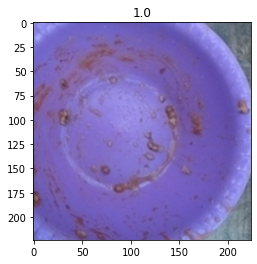

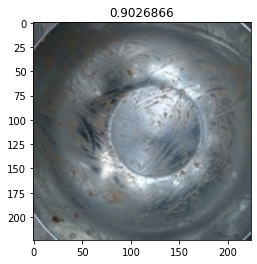

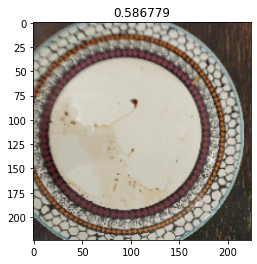

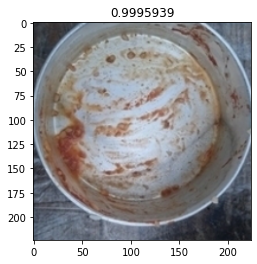

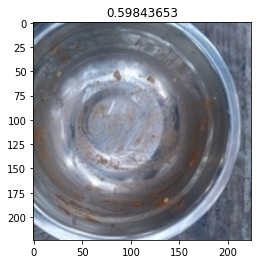

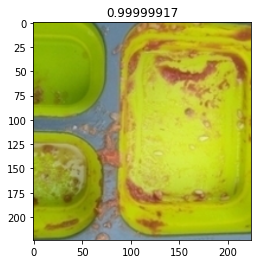

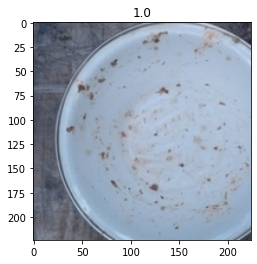

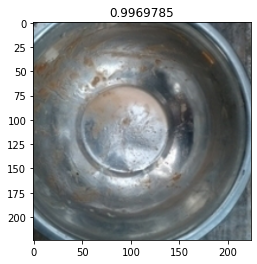

In [ ]:
inputs, labels, paths = next(iter(test_dataloader))

for img, pred in zip(inputs, test_predictions):
    show_input(img, title=pred)

In [ ]:
import pandas as pd

submission_df = pd.DataFrame.from_dict({'id': test_img_paths, 'label': test_predictions})

In [ ]:
submission_df['label'] = submission_df['label'].map(lambda pred: 'dirty' if pred > 0.5 else 'cleaned')
submission_df['id'] = submission_df['id'].str.replace('test/unknown/', '')
submission_df['id'] = submission_df['id'].str.replace('.jpg', '')
submission_df.set_index('id', inplace=True)
submission_df.head(n=6)

,label
id,
0000,dirty
0001,dirty
0002,dirty
0003,dirty
0004,dirty
0005,dirty


In [ ]:
submission_df.to_csv('final_submission.csv')

In [ ]:
submission_df.label.map({'dirty':1,'cleaned':0}).mean()

0.7768817204301075

In [ ]:
!rm -rf train val test

In [ ]:
from google.colab import files
files.download('final_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(submission_df)

        label
id           
0000    dirty
0001    dirty
0002  cleaned
0003    dirty
0004  cleaned
...       ...
0739    dirty
0740    dirty
0741  cleaned
0742    dirty
0743  cleaned

[744 rows x 1 columns]
